In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import plotly as py
import seaborn as sns
from wordcloud_fa import WordCloudFa
from wordcloud import WordCloud
from bidi.algorithm import get_display
import arabic_reshaper
from summerize import tfidf_features, word2vec_features
from joblib import dump, load
import pickle
from tqdm import tqdm
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import mean_squared_error, matthews_corrcoef
from matplotlib import pyplot
from sklearn.metrics import classification_report, f1_score
%matplotlib inline
from googletrans import Translator
translator = Translator()
py.offline.init_notebook_mode(connected=True)

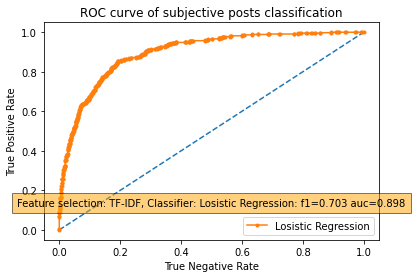

In [2]:
objective_subjective_classification_model = load('models/x30-tfidf-lreg.joblib')
df_train = pd.read_csv('data/df_train.csv')
tfidfX = tfidf_features(df_train)
y = df_train['X30']
trainX, testX, trainy, testy = train_test_split(tfidfX, y,  
                                                          random_state=42, 
                                                          test_size=0.3)
name = 'Losistic Regression'
feature = 'TF-IDF'
probs = objective_subjective_classification_model.predict_proba(testX)
probs = probs[:, 1]
yhat = objective_subjective_classification_model.predict(testX)
fpr, tpr, threshold = roc_curve(testy, probs)
pyplot.plot([0,1],[0,1],linestyle='--')
pyplot.plot(fpr, tpr, marker='.', label=name)
pyplot.title('ROC curve of subjective posts classification')
pyplot.xlabel('True Negative Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
f1 = f1_score(testy, yhat)
auc_score = roc_auc_score (testy, probs)
pyplot.text(0.5, 0.12, 'Feature selection: %s, Classifier: %s: f1=%.3f auc=%.3f' % (feature, name, f1, auc_score), ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
#pyplot.savefig('roc' + '.png', dpi=300)
pyplot.show()

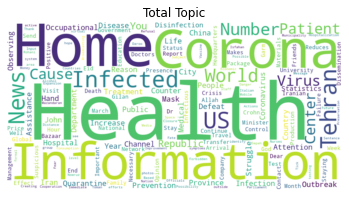

In [3]:
wc = WordCloud(width = 1000, height = 500, background_color="white")
with open('vars/total_topic.txt', "rb") as fp:   #Pickling
    topic_words_list = pickle.load(fp)
topic_words_string=' '.join(topic_words_list)
translated = translator.translate(topic_words_string)
topic_words_string_e = translated.text
with open('vars/total_topic_weight.txt', "rb") as fp:   #Pickling
    topic_words_weight_list = pickle.load(fp)
wordcloud =wc.generate(topic_words_string_e)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Total Topic")
#plt.savefig('total_topic' + '.png', dpi=300)
plt.show()

IndexError: list index out of range

/opt/jupyterhub/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 128313 missing from current font.

/opt/jupyterhub/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 128313 missing from current font.



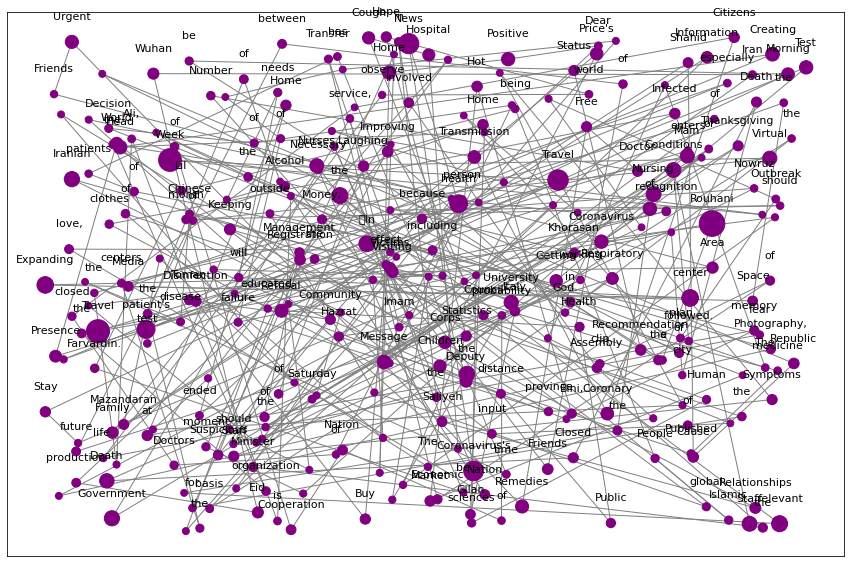

In [4]:
with open('vars/total_graph.txt', "rb") as fp:   #Pickling
    G =pickle.load(fp)
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.random_layout(G, dim=2)
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=1,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 node_size=[v*100000 for v in topic_words_weight_list],
                 ax=ax)
key_list = list(pos.keys())
key_string =' '.join(key_list)
translated = translator.translate(key_string)
txt = translated.text
key_e = txt.split()
# Create offset labels
i = 0
for key, value in pos.items():
    x, y = value[0], value[1]+.045
    ax.text(x, y,
            s = key_e[i],
#                bbox=dict(facecolor='red', alpha=0.1),
            horizontalalignment='center', fontsize=11)  
    i = i + 1
#plt.savefig('bg' + '.png', dpi=300)
plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]

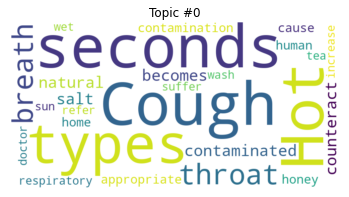

  7%|▋         | 1/15 [00:02<00:39,  2.84s/it]

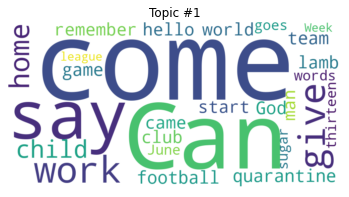

 13%|█▎        | 2/15 [00:05<00:35,  2.74s/it]

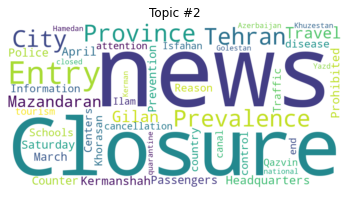

 20%|██        | 3/15 [00:08<00:32,  2.75s/it]

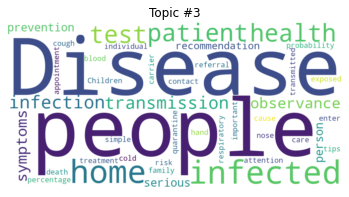

 27%|██▋       | 4/15 [00:11<00:31,  2.84s/it]

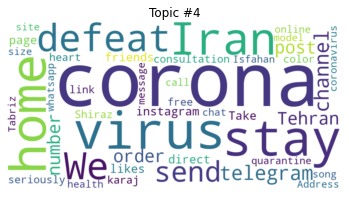

 33%|███▎      | 5/15 [00:13<00:27,  2.70s/it]

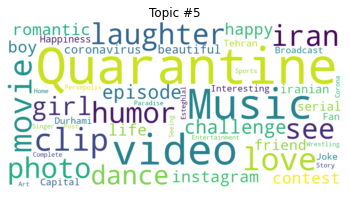

 40%|████      | 6/15 [00:16<00:24,  2.71s/it]

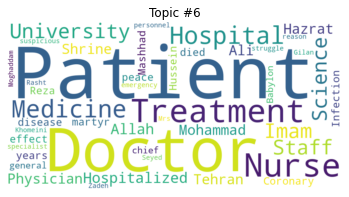

 47%|████▋     | 7/15 [00:19<00:21,  2.73s/it]

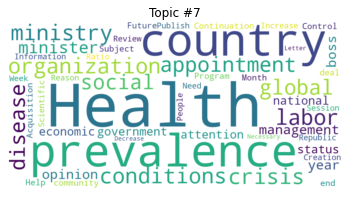

 53%|█████▎    | 8/15 [00:22<00:20,  2.87s/it]

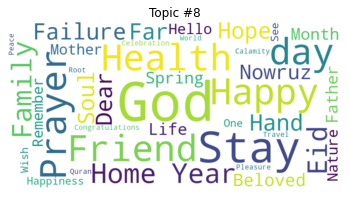

 60%|██████    | 9/15 [00:25<00:17,  2.89s/it]

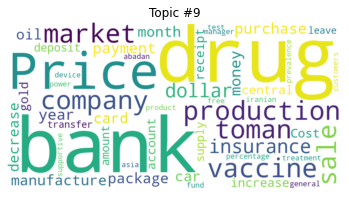

 67%|██████▋   | 10/15 [00:28<00:14,  2.96s/it]

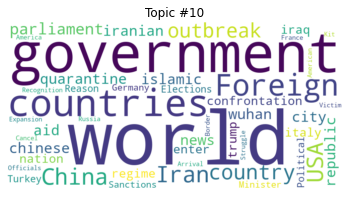

 73%|███████▎  | 11/15 [00:31<00:11,  2.91s/it]

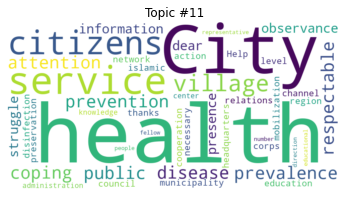

 80%|████████  | 12/15 [00:34<00:08,  2.92s/it]

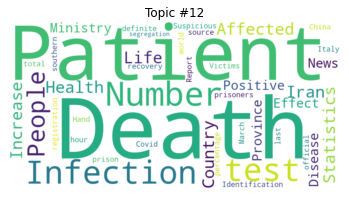

 87%|████████▋ | 13/15 [00:37<00:05,  2.94s/it]

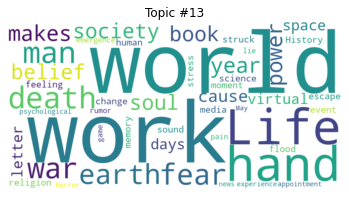

 93%|█████████▎| 14/15 [00:40<00:03,  3.07s/it]

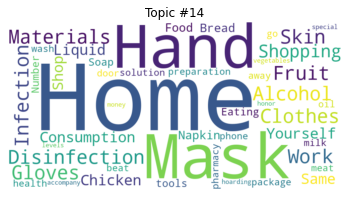

100%|██████████| 15/15 [00:43<00:00,  2.88s/it]


In [5]:
num_topics = 15
topic_items=50
for t in tqdm(range (num_topics)):
    topic_words_list =[]
    topic_words_weight_list = []
    topic_words_string =''
    topic_words_list_e = ''
    topic_file = 'vars/topic_' + str(t) + '.txt'    
    topic_file_weight = 'vars/topic_weight_' + str(t) + '.txt'
    with open(topic_file, "rb") as fp:   #Pickling
        topic_words_list = pickle.load(fp)        
    topic_words_string=', '.join(topic_words_list)
    translated = translator.translate(topic_words_string)
    topic_words_string_e = translated.text
    wordcloud =wc.generate(topic_words_string_e)
    topic_words_list_e = list(topic_words_string_e.split(' '))
    with open(topic_file_weight, "rb") as fp:   #Pickling
        topic_words_weight_list = pickle.load(fp)       
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic_' + str(t) + '.png', dpi=300)
    plt.show()


<Figure size 1080x504 with 0 Axes>

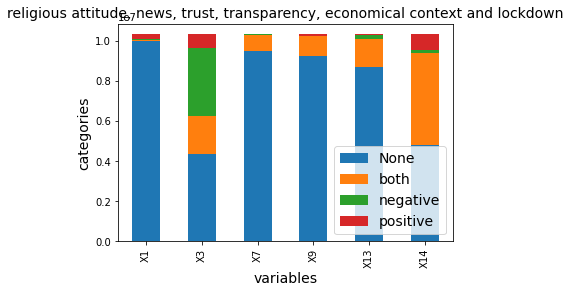

In [6]:
plt.rcParams.update({'font.size': 10})
df = pd.read_pickle('vars/vars1.pkl')
df_t = df.T
plt.figure(figsize=(15,7))
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['None','both',
           'negative', 'positive'],fontsize=14)
ax.set_title('religious attitude, news, trust, transparency, economical context and lockdown', fontdict={'fontsize':14})
ax.set_xlabel('variables', fontdict={'fontsize':14})
ax.set_ylabel('categories', fontdict={'fontsize':14})
fig = ax.get_figure()
#fig.savefig('vars1.png', dpi=300)

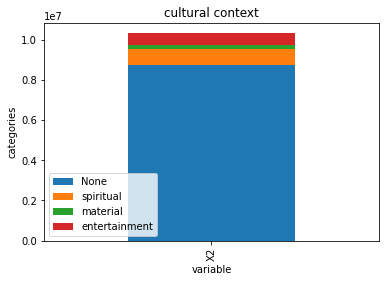

In [7]:
df = pd.read_pickle('vars/vars2.pkl')
df_t = df.T
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['None','spiritual',
           'material', 'entertainment'])
ax.set_title('cultural context')
ax.set_xlabel('variable')
ax.set_ylabel('categories')
fig = ax.get_figure()
#fig.savefig('vars2.png', dpi=300)

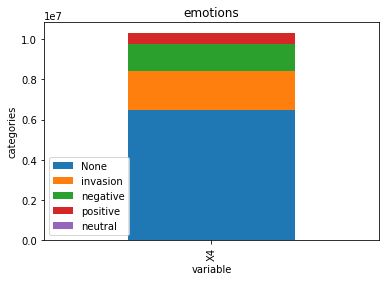

In [8]:
df = pd.read_pickle('vars/vars3.pkl')
df_t = df.T
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['None','invasion',
           'negative', 'positive',
           'neutral'])
ax.set_title('emotions')
ax.set_xlabel('variable')
ax.set_ylabel('categories')
fig = ax.get_figure()
#fig.savefig('vars3.png', dpi=300)

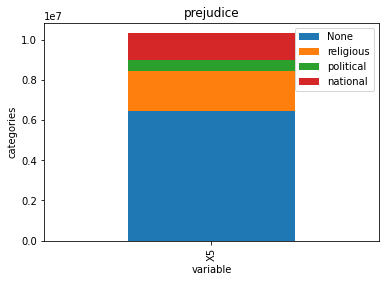

In [9]:
df = pd.read_pickle('vars/vars4.pkl')
df_t = df.T
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['None','religious',
           'political', 'national'])
ax.set_title('prejudice')
ax.set_xlabel('variable')
ax.set_ylabel('categories')
fig = ax.get_figure()
#fig.savefig('vars4.png', dpi=300)

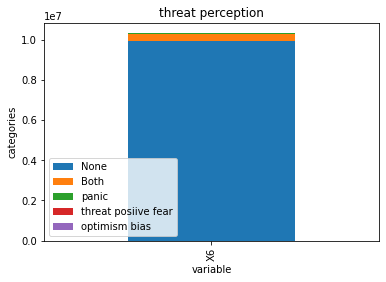

In [10]:
df = pd.read_pickle('vars/vars5.pkl')
df_t = df.T
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['None','Both',
           'panic', 'threat posiive fear',
           'optimism bias'])
ax.set_title('threat perception')
ax.set_xlabel('variable')
ax.set_ylabel('categories')
fig = ax.get_figure()
#fig.savefig('vars5.png', dpi=300)

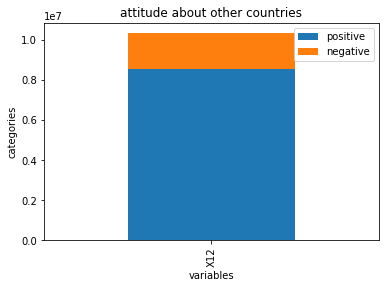

In [11]:
df = pd.read_pickle('vars/vars7.pkl')
df_t = df.T
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['positive','negative'])
ax.set_title('attitude about other countries')
ax.set_xlabel('variables')
ax.set_ylabel('categories')
fig = ax.get_figure()
#fig.savefig('vars6.png', dpi=300)

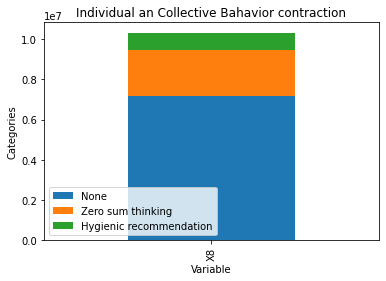

In [12]:
df = pd.read_pickle('vars/vars8.pkl')
df_t = df.T
ax = df_t.plot(kind='bar', stacked=True)
ax.legend(['None','Zero sum thinking',
           'Hygienic recommendation'])
ax.set_title('Individual an Collective Bahavior contraction')
ax.set_xlabel('Variable')
ax.set_ylabel('Categories')
fig = ax.get_figure()
#fig.savefig('vars7.png', dpi=300)

In [4]:
import pandas as pd
df_policy = pd.read_csv('data/policy.csv')
enl=[]
pn = []
pd = []
gd = []
for p in tqdm (df_policy['name']):
    plist =p.split(';')  
    jdate = plist[0].strip()
    translated = translator.translate(plist[1])
    pn.append(translated.text)
    pd.append(jdate) 
    gd.append('')
df_policy['name'] = pn
df_policy['jdate'] = pd
#df_policy['gdate'] = gd
translated = translator.translate('اعلام ورود رسمی کرونا به ایران')
new_row = {'name':translated.text, 'jdate':'1398-11-30'}
df_policy = df_policy.append(new_row, ignore_index=True)
translated = translator.translate('خروج ایران از وضعیت سفید و ورود به وضعیت زرد')
new_row = {'name':translated.text, 'jdate':'1398-12-03'}
df_policy = df_policy.append(new_row, ignore_index=True)
translated = translator.translate('شیب نمودار ابتلا به ویروس ویروس کرونا')
new_row = {'name':translated.text, 'jdate':'1398-12-09'}
df_policy = df_policy.append(new_row, ignore_index=True)
translated = translator.translate('شیوع ویروس جدید کرونا تقریباً تمامی استان‌های کشور')
new_row = {'name':translated.text, 'jdate':'1398-12-14'}
df_policy = df_policy.append(new_row, ignore_index=True)
df_policy.jdate[21] = '1399-03-17'
df_policy.jdate[22] = '1399-03-21'

100%|██████████| 34/34 [00:38<00:00,  1.14s/it]


NameError: name 'jdatetime' is not defined

In [7]:
import jdatetime
for index, row in df_policy.iterrows():
    ds = row['jdate'].split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    df_policy.loc[index, 'gdate'] = gregorian_date
    df_policy.loc[index, 'new_gdate'] = gregorian_date
df_policy = df_policy.sort_values(by=['gdate'])
df_policy = df_policy.set_index('gdate')

In [50]:
df_policy

,name,jdate,new_gdate
gdate,,,
2020-02-19,Corona officially announced its arrival in Iran,1398-11-30,2020-02-19
2020-02-22,Iran's exit from the white situation and enter...,1398-12-03,2020-02-22
2020-02-28,Slope diagram of corona virus infection,1398-12-09,2020-02-28
2020-03-04,Outbreak of new coronavirus in almost all prov...,1398-12-14,2020-03-04
2020-03-06,"From Saturday, everything will be back to normal",1398-12-16,2020-03-06
2020-03-13,All the provinces are involved,1398-12-23,2020-03-13
2020-03-14,We were proud,1398-12-24,2020-03-14
2020-03-15,We do not have quarantine,1398-12-25,2020-03-15
2020-03-18,We were honest,1398-12-28,2020-03-18


/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



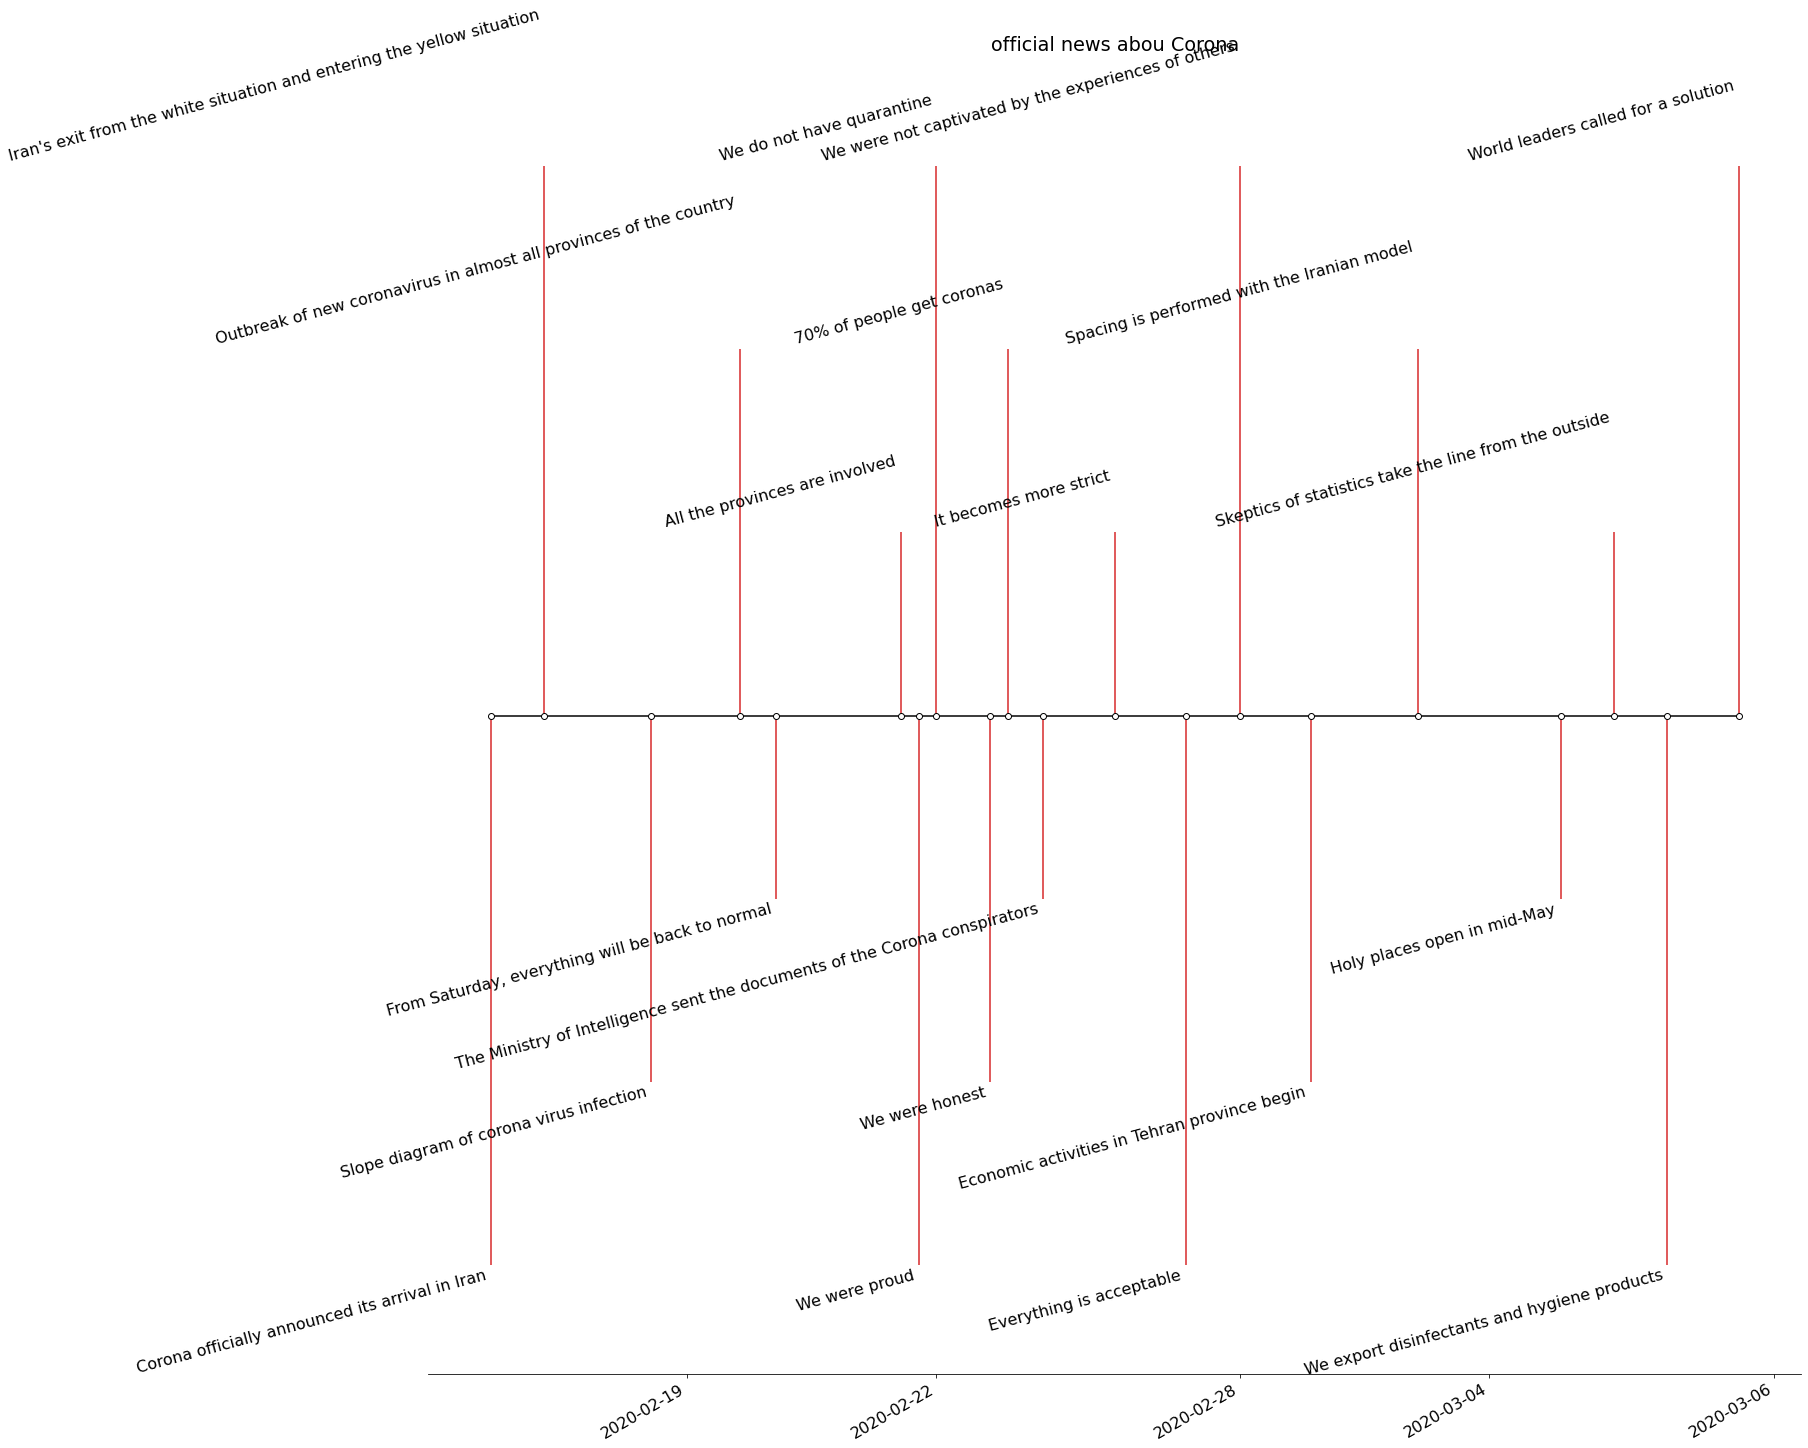

In [8]:
import matplotlib.pyplot as plt2
plt2.rcParams.update({'font.size': 16})
tnames = df_policy['name']
tdates =df_policy.index
names = tnames[:20]
dates = tdates [:20]
levels = np.tile([-3, 3, -2, 2, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]
fig, ax = plt2.subplots(figsize=(25, 20), constrained_layout=True)
ax.set(title='official news abou Corona')

ax.vlines(dates, 0, levels, color="tab:red") 
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w") 

for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                rotation=15,
                verticalalignment="bottom" if l > 0 else "top")

ax.set_xticklabels(dates)
plt2.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
#plt2.savefig('official_news' + '.png', dpi=300)
plt2.show()

Corona officially announced its arrival in Iran
2020-02-19
Iran's exit from the white situation and entering the yellow situation
2020-02-22
Outbreak of new coronavirus in almost all provinces of the country
2020-03-04
All the provinces are involved
2020-03-13
Economic activities in Tehran province begin
2020-04-05


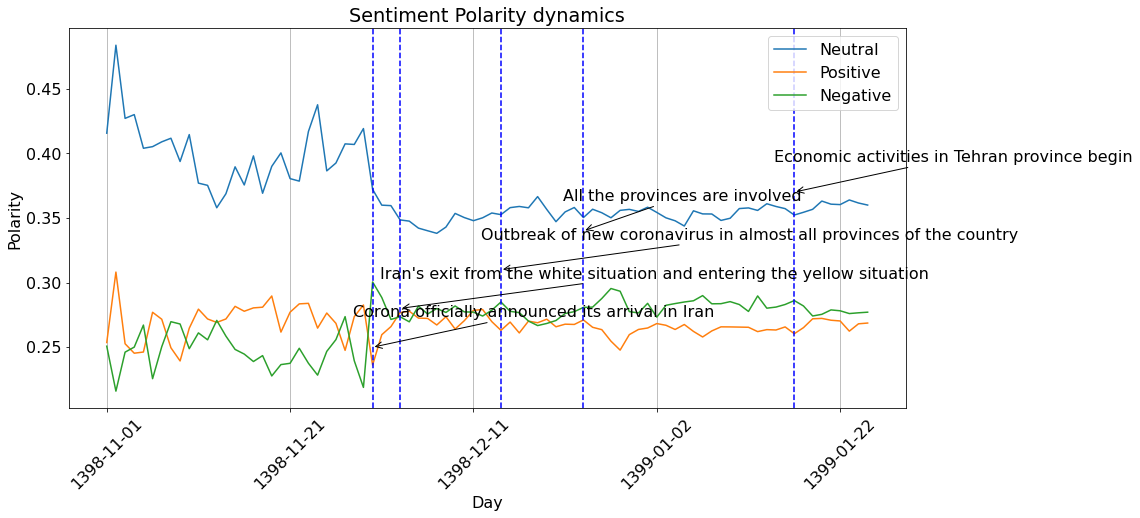

In [30]:
import pandas as pd
good_indices = [0,1,3,5,14]
gdates = dates[good_indices]
df_sentiment_score = pd.read_pickle('vars/df_sentiment_score.pkl')
for index, row in df_sentiment_score.iterrows():
    ds = row['new_jdate'].split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    df_sentiment_score.loc[index, 'gdate'] = gregorian_date
    df_sentiment_score.loc[index, 'new_gdate'] = gregorian_date
#df_sentiment_score = df_sentiment_score.set_index('gdate')
raw_data_ax = df_sentiment_score[['neu','pos','neg']].plot(rot=45, stacked=False, figsize=(15,7))
raw_data_ax.set_title('Sentiment Polarity dynamics')
raw_data_ax.set_xlabel('Day')
raw_data_ax.set_ylabel('Polarity')
raw_data_ax.grid(axis='x')
raw_data_ax.legend(['Neutral','Positive','Negative']) 
i = 0
for d in gdates:
    nw = np.where(df_sentiment_score['new_gdate']==d)
    if all(nw):
        idx = nw[0][0]
        raw_data_ax.axvline(idx, color='b', linestyle='--')
        dp = df_policy[df_policy['new_gdate']==d]
        raw_data_ax.annotate(dp.name[0],
                    xy=(idx, 0.25 + i), xycoords='data',
                    xytext=(-20, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
        i = i + 0.03
fig = raw_data_ax.get_figure()
#fig.savefig('sentiment.png', dpi=300)

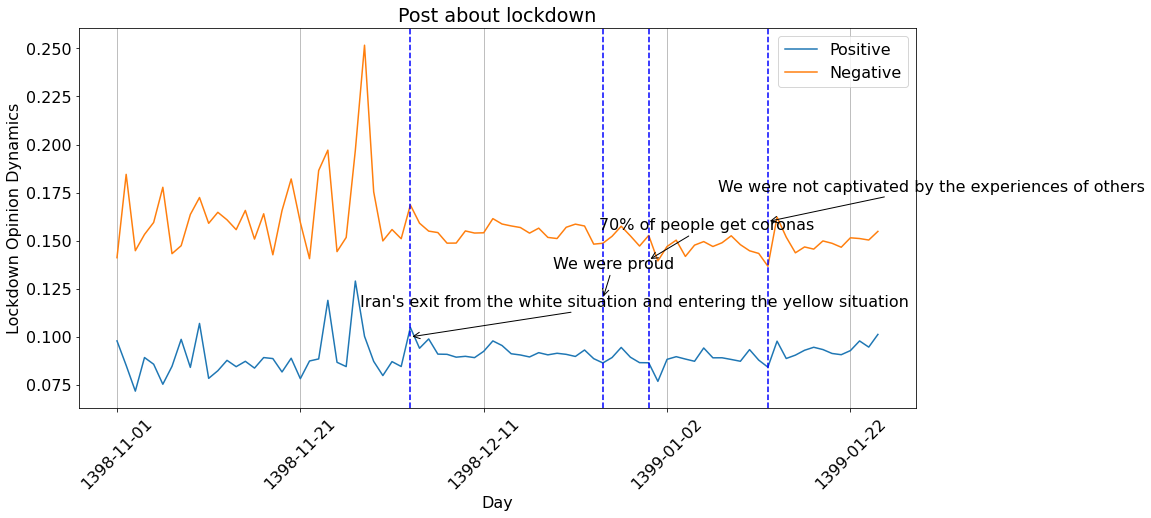

In [31]:
good_indices = [1,6,9,13]
gdates = dates[good_indices]
df_lockdown_opinion = pd.read_pickle('vars/df_lockdown_opinion.pkl')
for index, row in df_lockdown_opinion.iterrows():
    ds = row['new_jdate'].split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    df_lockdown_opinion.loc[index, 'gdate'] = gregorian_date
    df_lockdown_opinion.loc[index, 'new_gdate'] = gregorian_date
raw_data_ax = df_lockdown_opinion[['lpos','lneg']].plot(rot=45, stacked=False, figsize=(15,7))
raw_data_ax.set_title('Post about lockdown')
raw_data_ax.set_xlabel('Day')
raw_data_ax.set_ylabel('Lockdown Opinion Dynamics')
raw_data_ax.grid(axis='x')
raw_data_ax.legend(['Positive','Negative' ])
i = 0
for d in gdates:
    nw = np.where(df_lockdown_opinion['new_gdate']==d)
    if all(nw):
        idx = nw[0][0]
        raw_data_ax.axvline(idx, color='b', linestyle='--')  
        dp = df_policy[df_policy['new_gdate']==d]
        raw_data_ax.annotate(dp.name[0],
                    xy=(idx, 0.1 + i), xycoords='data',
                    xytext=(-50, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
        i = i + 0.02
fig = raw_data_ax.get_figure()
#fig.savefig('polarity.png', dpi=300)

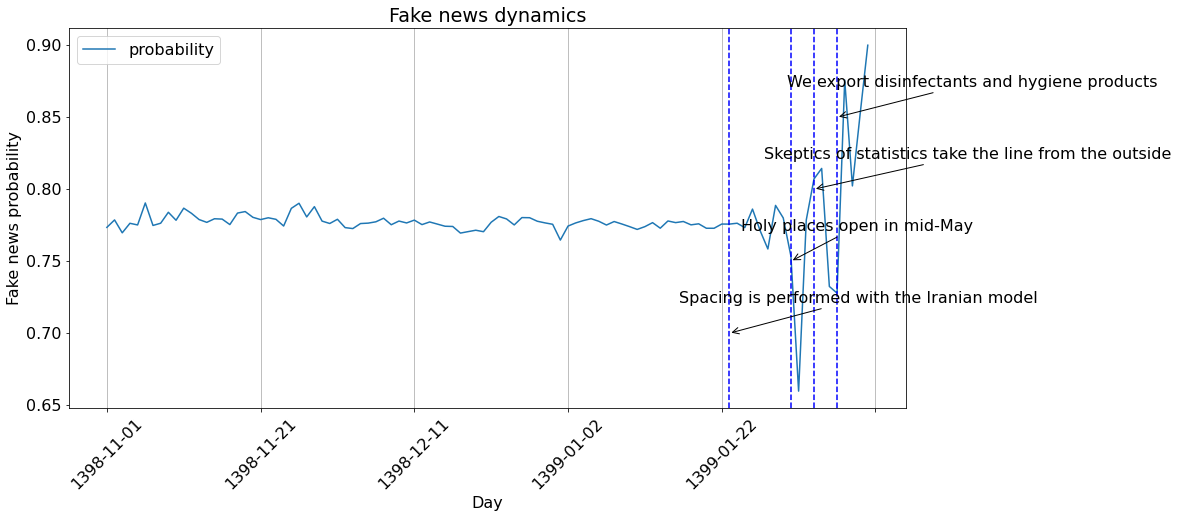

In [32]:
good_indices = [15,16,17,18]
gdates = dates[good_indices]
df_misinformation_opinion = pd.read_pickle('vars/df_misinformation_opinion.pkl')
for index, row in df_misinformation_opinion.iterrows():
    ds = row['new_jdate'].split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    df_misinformation_opinion.loc[index, 'gdate'] = gregorian_date
    df_misinformation_opinion.loc[index, 'new_gdate'] = gregorian_date
raw_data_ax = df_misinformation_opinion[['mi']].plot(rot=45, stacked=False, figsize=(15,7))
raw_data_ax.set_title('Fake news dynamics')
raw_data_ax.set_xlabel('Day')
raw_data_ax.set_ylabel('Fake news probability')
raw_data_ax.grid(axis='x')
raw_data_ax.legend(['probability'])
i = 0
for d in gdates:
    nw = np.where(df_misinformation_opinion['new_gdate']==d)
    if all(nw):
        idx = nw[0][0]
        raw_data_ax.axvline(idx, color='b', linestyle='--')      
        dp = df_policy[df_policy['new_gdate']==d]
        raw_data_ax.annotate(dp.name[0],
                    xy=(idx, 0.70 + i), xycoords='data',
                    xytext=(-50, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
        i = i + 0.05
fig = raw_data_ax.get_figure()
#fig.savefig('fake_news.png', dpi=300)

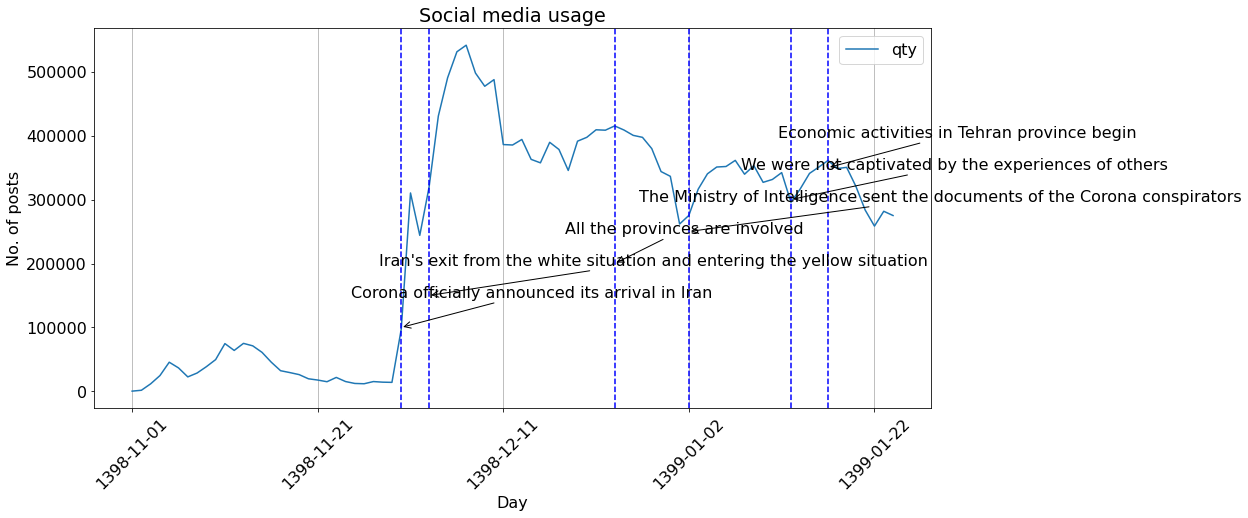

In [42]:
with open("vars/total_count.txt", "rb") as fp:   # Unpickling
    df_total_count = pickle.load(fp)
ff = list(df_total_count.index)
ff = [str(f).replace('-', '') for f in ff]
df_total_count['new_date'] = ff
df_total_count['new_date'] = df_total_count['new_date'].astype(int)
df_total_count = df_total_count.loc[df_total_count.new_date < 13990125]
good_indices = [0,1,5,10,13,14]
gdates = dates[good_indices]
df_total_count = pd.read_pickle('vars/df_total_count.pkl')
for index, row in df_total_count.iterrows():
    ds = str(index).split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    df_total_count.loc[index, 'gdate'] = gregorian_date
    df_total_count.loc[index, 'new_gdate'] = gregorian_date
raw_data_ax = df_total_count[['postId']].plot(rot=45, stacked=False, figsize=(15,7))
raw_data_ax.set_title('Social media usage')
raw_data_ax.set_xlabel('Day')
raw_data_ax.set_ylabel('No. of posts')
raw_data_ax.grid(axis='x')
raw_data_ax.legend(['qty'])
i = 0
for d in gdates:
    nw = np.where(df_total_count['new_gdate']==d)
    if all(nw):
        idx = nw[0][0]
        raw_data_ax.axvline(idx, color='b', linestyle='--')      
        dp = df_policy[df_policy['new_gdate']==d]
        raw_data_ax.annotate(dp.name[0],
                    xy=(idx, 100000 + i), xycoords='data',
                    xytext=(-50, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
        i = i + 50000
fig = raw_data_ax.get_figure()
#fig.savefig('social_media_usage.png', dpi=300)

100%|██████████| 14/14 [00:13<00:00,  1.07it/s]


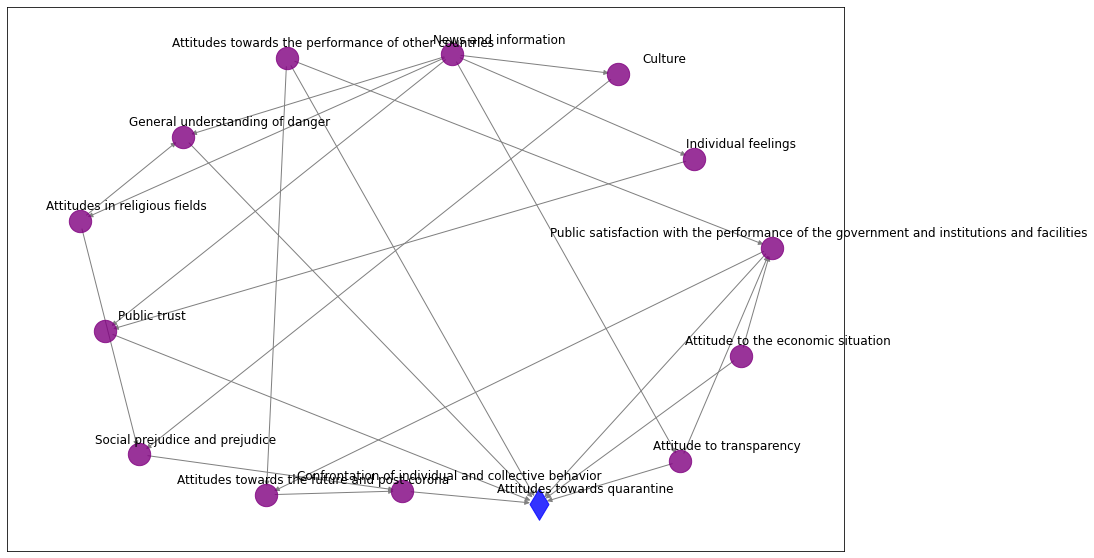

In [53]:
with open("vars/bbn_vars.txt", "rb") as fp:   # Unpickling
    labels = pickle.load(fp)
G = nx.DiGraph()
for i in range(14):
    G.add_node(i)
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3, 4, 5, 6, 7, 8, 10, 11, 12, 13],
                       node_color='purple',
                       node_shape = 'o',
                       node_size=500,
                       alpha=0.8,
                       ax=ax)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[9],
                       node_color='blue',
                       node_shape = 'd',
                       node_size=500,
                       alpha=0.8,
                       ax=ax)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1), (0,2), (3,1), (4,0), (4,3),
                                 (4,5), (4,2), (4,6), (4,7), (5,6),
                                 (1,8), (2,9), (6,9), (8,9), (7,10),
                                 (7,9), (11,8), (10,11), (10,9), (12,11),
                                 (12,10), (12,9), (13,10), (13,9)],
                       width=1,alpha=1,edge_color='grey',ax=ax)

for key, value in tqdm (pos.items()):
    x, y = value[0]+.135, value[1]+.045
    translated = translator.translate(labels [key])
    ax.text(x, y,
            s = translated.text,
            horizontalalignment='center', fontsize=12) 
    i+=1
#plt.savefig('bbn' + '.png', dpi=300)    
plt.show()

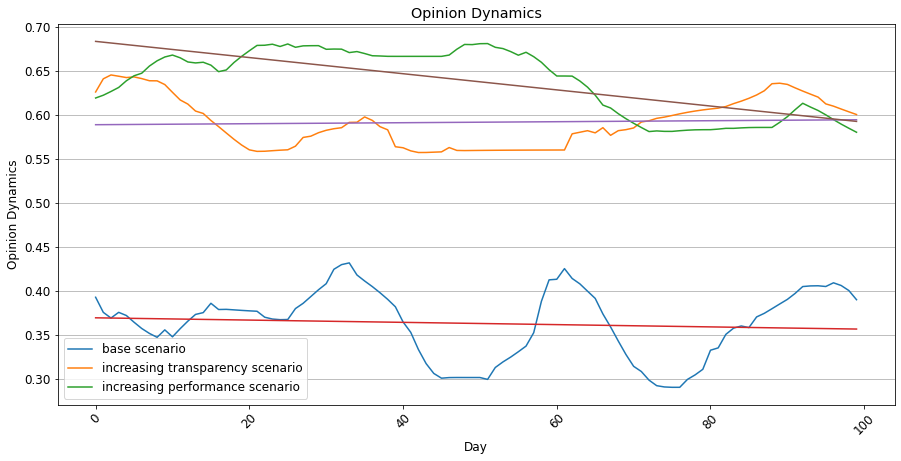

In [22]:
plt.rcParams.update({'font.size': 12})
opinion_dynamics = pd.read_pickle('vars/opinion_dynamics.pkl')
raw_data_ax = opinion_dynamics[['opinion_base','opinion_opacity','opinion_performance','opinion_base_hat1','opinion_opacity_hat1','opinion_performance_hat1']].plot(rot=45, stacked=False, figsize=(15,7), grid=True)
raw_data_ax.set_title('Opinion Dynamics')
raw_data_ax.set_xlabel('Day')
raw_data_ax.set_ylabel('Opinion Dynamics')
raw_data_ax.grid(axis='x')
raw_data_ax.legend(['base scenario','increasing transparency scenario','increasing performance scenario']) 
fig = raw_data_ax.get_figure()
#fig.savefig('opinion_dynamics.png', dpi=300)

/opt/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



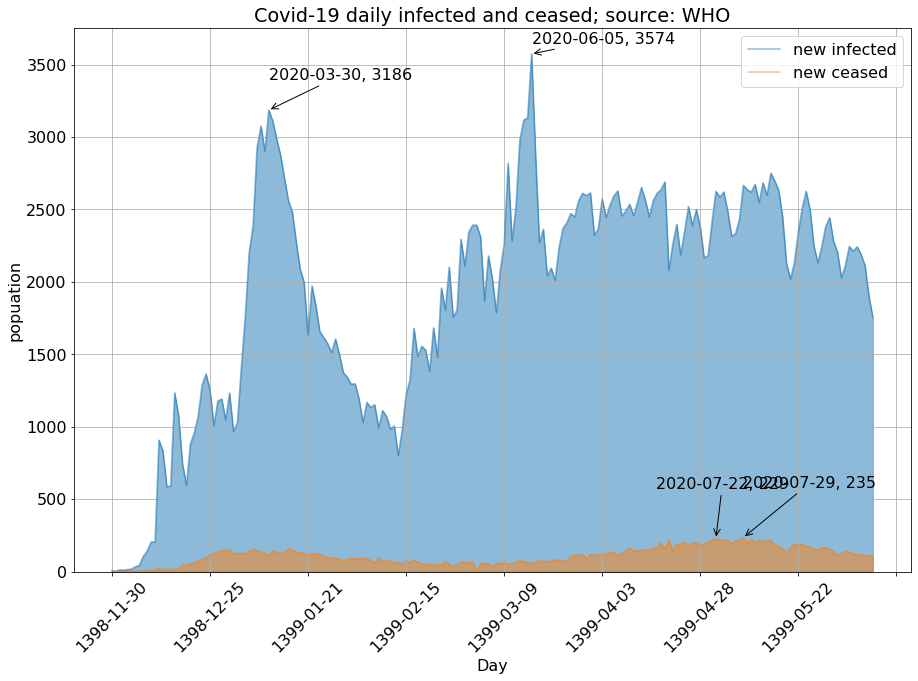

In [49]:
df_covid = pd.read_csv('data/who-iran-covid-data.csv')
df_covid['month'], df_covid['day'],df_covid['year'] = df_covid['Date_reported'].str.split('/').str
covid_dict = df_covid.to_dict('records')
jd = []
for elm in covid_dict:
    jd.append(jdatetime.date.fromgregorian(day=int(elm['day']),month=int(elm['month']),year=int(elm['year']))) 
df_covid['jdate'] = jd
df_covid = df_covid.set_index('jdate')
nc = df_covid[' New_cases']
good_list = nc.nlargest(2)
good_indices = good_list.index.values.tolist()
nc = df_covid[' New_cases']
case_list = nc.nlargest(2)
case_indices = case_list.index.values.tolist()
nd = df_covid[' New_deaths']
death_list = nd.nlargest(2)
death_indices = death_list.index.values.tolist()

raw_data_ax = df_covid[[' New_cases',' New_deaths']].plot(kind='area', alpha=0.5, rot=45, stacked=False, figsize=(15,10))
raw_data_ax.grid(axis='y')
raw_data_ax.set_title('Covid-19 daily infected and deceased; source: WHO')
raw_data_ax.set_xlabel('Day')
raw_data_ax.set_ylabel('popuation')
raw_data_ax.grid(axis='x')
raw_data_ax.legend(['new infected','new deceased']) 
i = 0
k =10
for c in case_indices:
    nw = np.where(df_covid.index == c)
    ds = str(c).split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    if all(nw):
        idx = nw[0][0]
#       raw_data_ax.axvline(x =idx, ymin = 0, ymax = good_list[i], color='g', linestyle='--')    
        raw_data_ax.annotate(str(gregorian_date) + ', ' + str(case_list[i]),
                    xy=(idx, case_list[i]), xycoords='data',
                    xytext=(0, k), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
        i = i + 1
        k = 30
i = 0
k= 0
for d in death_indices:
    nw = np.where(df_covid.index == d)
    ds = str(d).split('-')
    gregorian_date = jdatetime.date(int(ds[0]),int(ds[1]),int(ds[2])).togregorian()
    if all(nw):
        idx = nw[0][0]   
        raw_data_ax.annotate(str(gregorian_date) + ', ' + str(death_list[i]) ,
                    xy=(idx, death_list[i]), xycoords='data',
                    xytext=(k, 50), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->"))
        i = i + 1
        k = -60
fig = raw_data_ax.get_figure()
#fig.savefig('who.png', dpi=300)

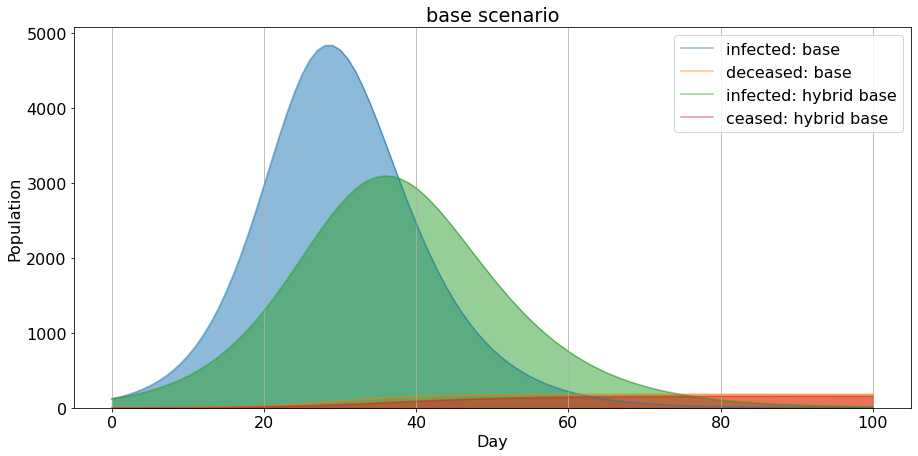

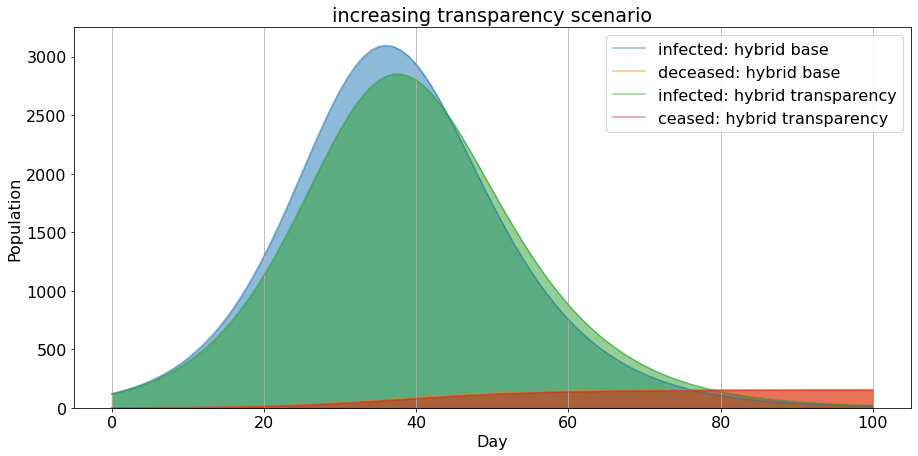

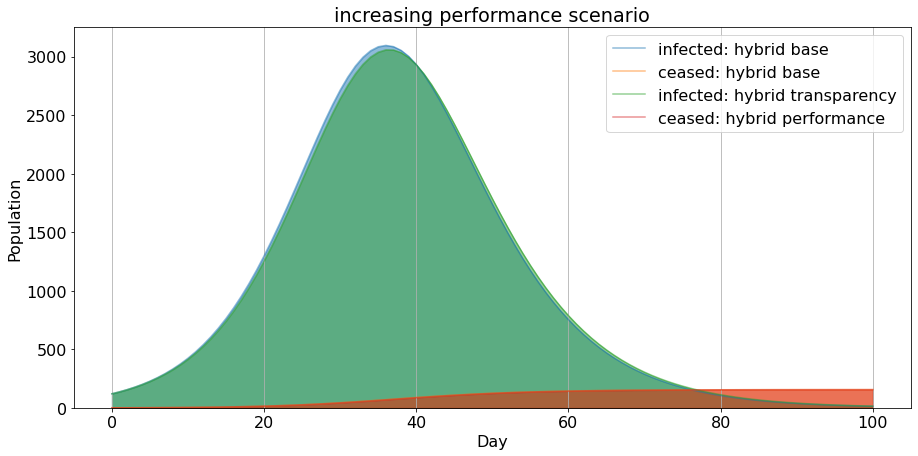

In [51]:
system_dynamics = pd.read_pickle('vars/system_dynamics.pkl')
sd_ax1 = system_dynamics[['infectious_base','deceased_base','infectious_hybrid_base', 'deceased_hybrid_base']].plot(kind='area', alpha=0.5, stacked=False,figsize=(15,7))
sd_ax1.set_title('base scenario')
sd_ax1.set_xlabel('Day')
sd_ax1.set_ylabel('Population')
sd_ax1.grid(axis='x')
sd_ax1.legend(['infected: base','deceased: base','infected: hybrid base','ceased: hybrid base']) 
fig = sd_ax1.get_figure() 
plt.savefig('sd_base' + '.png', dpi=300)
plt.show() 
    
sd_ax2 = system_dynamics[['infectious_hybrid_base','deceased_hybrid_base','infectious_hybrid_opacity', 'deceased_hybrid_opacity']].plot(kind='area', alpha=0.5, stacked=False,figsize=(15,7))
sd_ax2.set_title('increasing transparency scenario')
sd_ax2.set_xlabel('Day')
sd_ax2.set_ylabel('Population')
sd_ax2.grid(axis='x')
sd_ax2.legend(['infected: hybrid base','deceased: hybrid base','infected: hybrid transparency','ceased: hybrid transparency']) 
fig = sd_ax2.get_figure()  
plt.savefig('sd_transparency' + '.png', dpi=300)
plt.show() 
    
sd_ax3 = system_dynamics[['infectious_hybrid_base','deceased_hybrid_base','infectious_hybrid_performance', 'deceased_hybrid_performance']].plot(kind='area', alpha=0.5, stacked=False,figsize=(15,7))
sd_ax3.set_title('increasing performance scenario')
sd_ax3.set_xlabel('Day')
sd_ax3.set_ylabel('Population')
sd_ax3.grid(axis='x')
sd_ax3.legend(['infected: hybrid base','ceased: hybrid base','infected: hybrid transparency','ceased: hybrid performance']) 
fig = sd_ax3.get_figure() 
plt.savefig('sd_productivity'  + '.png', dpi=300)
plt.show()   